## Import Libraries & Load Dataset

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

## Tesla Dataset

In [2]:
data = pd.read_csv("Tesla.csv - Tesla.csv.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data = data[["Date","Close"]]
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


<AxesSubplot:xlabel='Date', ylabel='Price'>

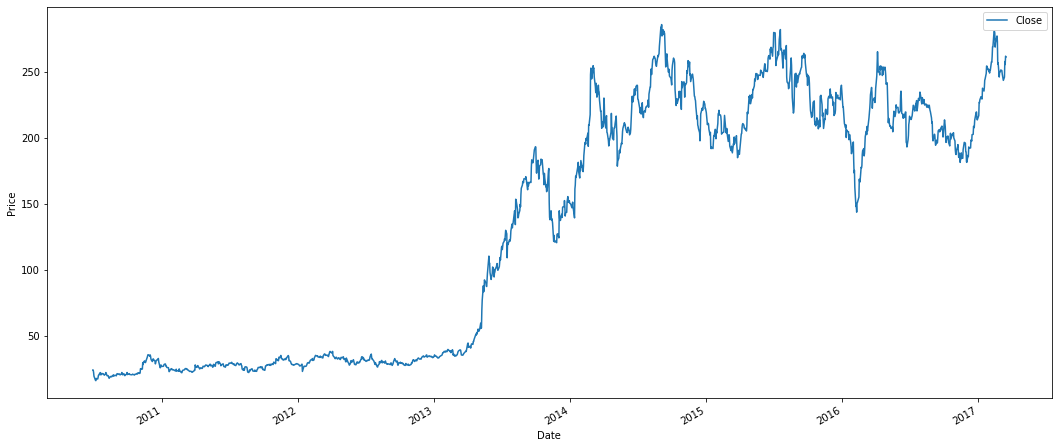

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

# Preprocessing

In [5]:
X = data[["Close"]]
Train , Test = X[:1500],X[1500:]

## Scaling
### StandardScaler

In [6]:
scale = StandardScaler()
Train = scale.fit_transform(Train)
Test = scale.transform(Test)
with open("StandardScaler","wb") as f:
    pickle.dump(scale,f)

In [7]:
X_Train,Y_Train = [],[]
for i in range(len(Train)-10):
    X_Train.append(Train[i:i+10])
    Y_Train.append(Train[i+10])
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

In [8]:
X_Test,Y_Test = [],[]
for i in range(len(Test)-10):
    X_Test.append(Test[i:i+10])
    Y_Test.append(Test[i+10])
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

# Model
## Recurrent Neural Network

## LSTM

In [9]:
model = Sequential()
model.add(LSTM(64,input_shape=(X_Train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

In [10]:
model.compile(optimizer="adam",loss="mean_absolute_error")
checkpoint = ModelCheckpoint("Tesla.h5",monitor="val_loss",mode="min",save_best_only=True)

In [11]:
history = model.fit(X_Train,Y_Train,epochs=50,batch_size=20,validation_data=(X_Test,Y_Test),callbacks=[checkpoint])

Epoch 1/50
75/75 [==============================] - 8s 39ms/step - loss: 0.2365 - val_loss: 0.1078
Epoch 2/50
75/75 [==============================] - 1s 18ms/step - loss: 0.1195 - val_loss: 0.1086
Epoch 3/50
75/75 [==============================] - 1s 20ms/step - loss: 0.1242 - val_loss: 0.1132
Epoch 4/50
75/75 [==============================] - 1s 20ms/step - loss: 0.1140 - val_loss: 0.0941
Epoch 5/50
75/75 [==============================] - 1s 19ms/step - loss: 0.1167 - val_loss: 0.0923
Epoch 6/50
75/75 [==============================] - 1s 15ms/step - loss: 0.1186 - val_loss: 0.1577
Epoch 7/50
75/75 [==============================] - 1s 16ms/step - loss: 0.1246 - val_loss: 0.0915
Epoch 8/50
75/75 [==============================] - 1s 16ms/step - loss: 0.1167 - val_loss: 0.0895
Epoch 9/50
75/75 [==============================] - 1s 16ms/step - loss: 0.1093 - val_loss: 0.0902
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 0.1067 - val_loss: 0.0982
Epoch 11/

# Predict

In [12]:
pred_train = model.predict(X_Train)
pred_test = model.predict(X_Test)
pred_train = scale.inverse_transform(pred_train)
pred_test = scale.inverse_transform(pred_test)
pred = np.concatenate([pred_train,pred_test],axis=0)

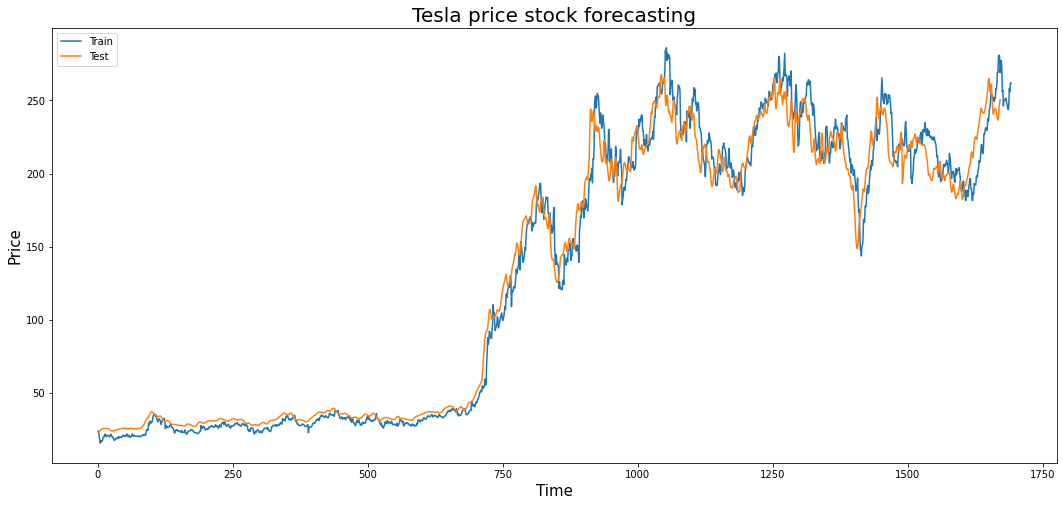

In [16]:
plt.figure(figsize=(18,8))
plt.plot(X,label="Train")
plt.plot(pred,label="Test")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Tesla price stock forecasting",fontsize=20)
plt.legend()